# Investigating Fandango Movie Ratings

In October 2015, data journalist Walt Hickey analyzed movie ratings data and found strong evidence suggesting that the [Fandango](https://www.fandango.com/) - an online movie ratings aggregation system - is biased and unfair. It's a great piece of data journalism and well worth reading, and he published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango uses a five-star rating system with a minimum rating of zero and a maximum rating of five stars.

![](https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png)

Hickey found a big gap between the number of stars users saw and the actual score they could find in the page's HTML. This is what he was able to find:

* The real score was always rounded up to the next half star. For example, a movie with a 4.1 rating would be rounded up to 4.5 stars, not down to 4 stars as you might expect.
* Rounding up to the nearest whole star occurred in 8% of the ratings analyzed. For example, a rating of 4.5 stars would be rounded up to 5 stars.
* In the case of one movie rating, the rounding up was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango officials responded that the uneven rounding was due to a bug in their system and not deliberate, and vowed to fix the bug as soon as possible. It is likely that this has already been done, although we can't say for sure because the actual rating value no longer seems to be displayed in the HTML of the pages.

In this project, to see if Fandango's rating system has changed since Hickey's analysis, we'll analyze more recent movie rating data.

## Understanding the Data

Comparing the characteristics of Fandango's rating system before and after Hickey's analysis is one of the best ways to see if anything has changed. Fortunately, for both of those time periods, we have ready-made data:

* Walt Hickey has made the data from his analysis publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). To analyze the characteristics of Fandango's review system before his analysis, we'll use the data he collected.

* Movie ratings data for films released in 2016 and 2017 were collected by one of the team members at Dataquest. We'll use this data to analyze the characteristics of the rating system after Hickey's analysis, as it is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17).

-----------------------------

`fandango_score_comparison.csv`

|Column |Definition|
| :----- | :----- |
FILM |	The film in question
RottenTomatoes|	The Rotten Tomatoes Tomatometer score for the film
RottenTomatoes_User|	The Rotten Tomatoes user score for the film
Metacritic|	The Metacritic critic score for the film
Metacritic_User|	The Metacritic user score for the film
IMDB	|The IMDb user score for the film
Fandango_Stars|	The number of stars the film had on its Fandango movie page
Fandango_Ratingvalue|	The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
RT_norm	|The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system
RT_user_norm	|The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
Metacritic_norm	|The Metacritic critic score for the film, normalized to a 0 to 5 point system
Metacritic_user_nom|	The Metacritic user score for the film, normalized to a 0 to 5 point system
IMDB_norm	|The IMDb user score for the film, normalized to a 0 to 5 point system
RT_norm_round	|The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
RT_user_norm_round|	The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_norm_round|	The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_norm_round|	The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
IMDB_norm_round|	The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_vote_count|	The number of user votes the film had on Metacritic
IMDB_user_vote_count|	The number of user votes the film had on IMDb
Fandango_votes|	The number of user votes the film had on Fandango
Fandango_Difference|	The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

------------------------

`movie_ratings_16_17.csv`

|Column|	Description|
|:----|:-----|
movie |	the name of the movie
year	|the release year of the movie
metascore	|the Metacritic rating of the movie (the "metascore" - critic score)
imdb|	the IMDB rating of the movie (user score)
tmeter|	the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
audience|	the Rotten Tomatoes rating of the movie (user score)
fandango|	the Fandango rating of the movie (user score)
n_metascore|	the metascore normalized to a 0-5 scale
n_imdb|	the IMDB rating normalized to a 0-5 scale
n_tmeter|	the tomatometer normalized to a 0-5 scale
n_audience|	the Rotten Tomatoes user score normalized to a 0-5 scale
nr_metascore|	the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
nr_imdb|	the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
nr_tmeter|	the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
nr_audience|	the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

-----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 200
pd.options.display.max_columns = 50

previous = pd.read_csv('D:/fandango_score_comparison.csv')
after = pd.read_csv('D:/movie_ratings_16_17.csv')

In [2]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In the `previous` and `after` datasets, there are many columns that are not of interest to us, so let's separate the columns that may be useful for analysis.

In [4]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


We aim to see if Fandango's rating system was altered as a result of Hickey's analysis. All movie ratings stored on Fandango's website, regardless of release year, are the population of interest for our analysis.

We're interested in determining whether the parameters of this population have changed since Hickey's analysis, and are therefore interested in sampling the population at two different times-before and after Hickey's analysis-to compare the two conditions.

The data that we're working with were sampled at the times that we want: one sample was taken before the analysis, and the other was taken after the analysis. Since our goal is to describe the population, it is important to ensure that the sampling is representative, or else there will be a large sampling error and, eventually, incorrect conclusions.

Hickey's article and the `README.md` of the [dataset's repository](https://github.com/fivethirtyeight/data/tree/master/fandango) tell us that he used the following sampling criteria:

* At the time of sampling (August 24, 2015), the movie must have had at least 30 fan reviews on Fandango's website.
* The Movie Must Have Been Sold in 2015.

The sample was clearly not random, because not every movie had an equal chance of being included in the sample - some movies didn't stand a chance at all (like those with less than 30 Fan Ratings, or those without tickets sold in 2015). There's a question of whether this sample is representative of the whole population you want to describe. It's more likely that it's not, especially because this sample is subject to time trends (e.g., movies in 2015 may have been exceptionally good or bad in comparison to other years).


The sampling conditions (as described in the `README.md` of the [dataset's repository](https://github.com/mircealex/Movie_ratings_2016_17)) for our other sample were as follows:

* Movie must have been released during 2016 or later.
* There should be a significant number of votes and reviews (how many is not clear from README or data).

This second sample, too, is trending over time and probably isn't representative of our target population.

These two authors were guided by specific research questions and criteria for sampling. The sampling method they used is known as **selective sampling**. These samples don't seem very useful to us, even though they were good enough for their research.


# Changing the Goal of our Analysis

At this point, there are at least two options: collect new data, or change the goal of our analysis with some constraints.

Compared to collecting new data, changing our goal seems to be a much quicker choice. Besides, at this point it's practically impossible to collect a new sample before Hickey's analysis.

Our new goal is to see if there's a difference between Fandango's 2015 popular movie ratings and Fandango's 2016 popular movie ratings. This new goal should also be a pretty good proxy for the goal we originally set for ourselves.

# Isolating the Samples We Need

The new target now gives us two populations to describe and compare:

* Fandango reviews for the most popular releases in 2015.
* Fandango reviews for the most popular releases in 2016.


"Popular" is vague, and we need to define it precisely before proceeding. We'll use Hickey's 30 Fan Ratings benchmark and consider a movie "popular" only if it has 30 or more Fan Ratings on Fandango.

Our second sample does not provide any information about the number of fan ratings, even though one of the sampling criteria is the popularity of the movie. Once again, we should be skeptical and ask ourselves if this sample is really representative and if it contains popular movies (movies with more than 30 fan ratings).

A quick way to check the representativeness of this sample is to take a random sample of 10 movies from the sample and then check the number of fan ratings for yourself on the Fandango web site. In the ideal case, at least 8 of the 10 movies will have 30 or more fan ratings.

In [7]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of February 2023, these are the fan ratings we found:

|movie| fan rating|
|:----|:----------|
Mechanic: Resurrection | 25,704
Warcraft  | 31,965
Max Steel | 6,911
Me Before You | 30,928
Fantastic Beasts and Where to Find Them	| 88,876
Cell	  | 180,973
Genius	  | 12
Sully	  | 48,847
A Hologram for the King | 10,280
Captain America: Civil War| 186,187


--------------
90% of what we've sampled is popular. This is enough for us to be able to move forward with a bit more confidence.

Let's check the other data set for popular films. It should only take a few seconds to double-check, although the documentation clearly states that only movies with at least 30 fan ratings are included.

In [8]:
fandango_previous.query('Fandango_votes < 30').sum()

FILM                    0.0
Fandango_Stars          0.0
Fandango_Ratingvalue    0.0
Fandango_votes          0.0
Fandango_Difference     0.0
dtype: float64

If you explore the two datasets, you'll notice that there are movies with a release year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's dataset and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the `FILM` column.

In [9]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [10]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [11]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = fandango_previous.query('Year == "2015"')
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now, let's move to another dataset.

In [13]:
fandango_2016 = fandango_after.query('year == 2016')
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

# Comparing Distribution Shapes for 2015 and 2016

Our goal is to determine whether or not there is any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to do this is to analyze and compare the distributions of movie ratings for the two samples.

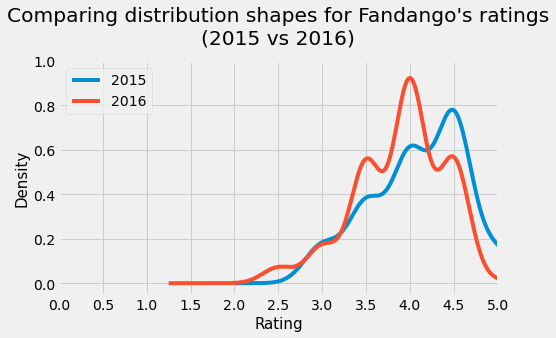

In [14]:
style.use('fivethirtyeight')
plt.subplots(figsize = (7,4))

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.xticks(np.arange(0,5.1,.5))
plt.xlim(0,5)
plt.ylim(-.05,1)
plt.xlabel('Rating', size =15)
plt.ylabel('Density', size =15)
plt.legend(loc = 'upper left')
plt.title('Comparing distribution shapes for Fandango\'s ratings\n(2015 vs 2016)', y = 1.05)

plt.show()

There are two interesting things about the above figure:

* Both distributions are heavily skewed to the left.
* Compared to the 2015 distribution, the 2016 distribution is slightly skewed to the left.

The left-skewed distribution suggests that movies on Fandango tend to be rated high and very high. The high ratings are a bit dubious when combined with the fact that Fandango sells tickets. Investigating this further-ideally in a separate project, since it's irrelevant to the current goal of our analysis-would be really interesting.

Very interesting for our analysis is the slight left shift of the 2016 distribution. It is an indication that the number of ratings was slightly lower in 2016 than in 2015. This suggests that the 2015 Fandango reviews of popular films were indeed different from the 2016 Fandango reviews of popular films. We can also see the direction of the difference: ratings were slightly lower in 2016 compared to 2015.

# Comparing Relative Frequencies

We seem to be on a good track thus far, but we need to do some finer-grained analysis. Lets have a look at the frequency tables of the two distributions to analyze some numbers. We normalize the tables and show percentages instead because the datasets have different numbers of movies.

In [22]:
print('2016' + '\n\n' + '*' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() *100

2016

****************


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [23]:
print('2015' + '\n\n' + '*' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() *100

2015

****************


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

Compared to 2015, the percentage of very high ratings (4.5 and 5 stars) was significantly lower in 2016. In 2016, less than 1% of movies had a perfect rating of 5 stars, in contrast to 2015, when the percentage was nearly 7%. Ratings of 4.5 were also more popular in 2015, with about 13% more movies rated 4.5 in 2015 compared to 2016.

The minimum rating is also lower for 2016: 2.5 stars rather than 3 stars, which was the minimum for 2015. Between the two frequency distributions there is a clear difference.

The percentage increased in 2016 for some other ratings. Compared to 2015, the percentage of films receiving 3.5 and 4 stars increased in 2016. 3.5 and 4.0 are high ratings, and this calls into question the direction of the change that we saw in the kernel density plots.

# Determining the Direction of the Change

To get more precise information about the direction of change, let's take some summary measures. Below, we'll calculate the mean, median, and mode for both distributions, and then use a bar graph to plot the values.

In [17]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


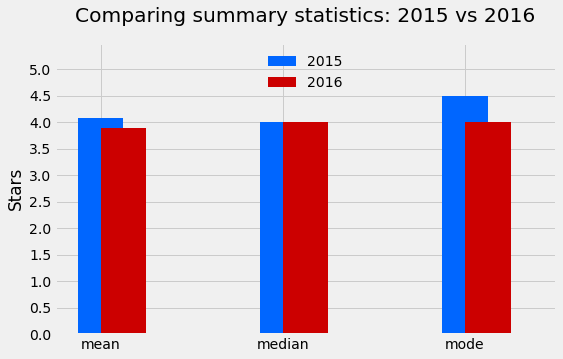

In [18]:
style.use('fivethirtyeight')


summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.05)
plt.legend(framealpha = 0, loc = 'upper center')

plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [19]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]


0.04842683568951993

The mode is 0.5 lower in 2016, while the median is the same for both distributions. Combined with what we saw for the average, this confirms the direction of the change we saw on the kernel density plot: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

## Conclusion

Our analysis revealed that a slight difference did indeed exist between Fandango ratings for popular films from 2015 and Fandango ratings for popular films from 2016. Our analysis also showed that, on average, popular movies released in 2016 had lower ratings on Fandango than popular movies released in 2015.

While we cannot be completely sure of the cause of this change, there is a very high probability that it is the result of Fandango's correction of the biased rating system in response to Hickey's analysis.